# Compare Jaccard, Dice, Cosine metrics, AD * Gradient

- [Jaccard index](https://en.wikipedia.org/wiki/Jaccard_index)
- [Dice coefficient](https://en.wikipedia.org/wiki/S%C3%B8rensen%E2%80%93Dice_coefficient)
- [Cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity)
- [AD * Gradient](http://new.owieczka.net/wp-content/publication/2009/3dtvcon-bp.pdf)

In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from glob import glob
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

import shutil

# Project
project_common_path = os.path.dirname('.')
project_common_path = os.path.abspath(os.path.join(project_common_path, '..', 'common'))
if not project_common_path in sys.path:
    sys.path.append(project_common_path)


In [6]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [72]:
def jaccard_index(y_true, y_pred, verbose=0):
    """
    Jaccard index = |A ^ B| / |A U B|
                  = |A ^ B| / (|A| + |B| - |A ^ B|)
    if A = B = empty => 1
    
    
    :param y_true: ndarray of shape (N,H,W,1), dtype np.uint8 and should be binary: 0, 1
    :param y_pred: ndarray of shape (N,H,W,1), dtype np.uint8 and should be binary: 0, 1
    """        
    intersection = np.sum(y_true * y_pred, axis=(1,2,3))
    union = np.sum(y_true, axis=(1,2,3)) + np.sum(y_pred, axis=(1,2,3)) - intersection    
    index = (intersection + 1e-15) / (union + 1e-15)
    if verbose > 0:
        print("index: ", index)
    return np.mean(index, axis=0)


def dice_coeff(y_true, y_pred, verbose=0):
    """
    Sorensen-Dice coefficient:
    
    dice = 2 * |A ^ B| / (|A| + |B|)
        
    :param y_true: ndarray of shape (N,H,W,1), dtype np.uint8 and should be binary: 0, 1
    :param y_pred: ndarray of shape (N,H,W,1), dtype np.uint8 and should be binary: 0, 1
    """        
    intersection = 2.0 * np.sum(y_true * y_pred, axis=(1,2,3))
    denom = np.sum(y_true, axis=(1,2,3)) + np.sum(y_pred, axis=(1,2,3))
    coeff = intersection / (denom + 1e-15)    
    if verbose > 0:
        print("coeff: ", coeff)
    return np.mean(coeff, axis=0)


def cosine_similarity(y_true, y_pred, verbose=0):
    """
    Cosine similarity:
    
    res = |A ^ B| / (|A| * |B|)
        
    :param y_true: ndarray of shape (N,H,W,1), dtype np.uint8 and should be binary: 0, 1
    :param y_pred: ndarray of shape (N,H,W,1), dtype np.uint8 and should be binary: 0, 1
    """
    intersection = np.sum(y_true * y_pred, axis=(1,2,3))
    denom = np.sum(y_true, axis=(1,2,3)) * np.sum(y_pred, axis=(1,2,3))
    coeff = intersection / (denom + 1e-15)    
    if verbose > 0:
        print("coeff: ", coeff)
    return np.mean(coeff, axis=0)

    

Basic checks

```
y_true and y_pred

    x x x x x
    x x + + + O 
    x x + + + O
    x x + + + O
        O O O O
        O O O O

```
Jaccard index = 9 / (20 + 20 - 9) = 0.2903225806451613

Dice coefficient = 2 * 9 / (20 + 20) = 0.45

In [81]:
y_true = np.zeros((6, 32, 32, 1), dtype=np.uint8)
y_true[0, :, :, 0] = 0
y_true[1, :5, :5, 0] = 1
y_true[2, 5:9, 5:10, 0] = 1
y_true[3, 5:9, 5:10, 0] = 1
y_true[4:, :, :, 0] = 0
y_true[5, 5:10, 6:10, 0] = 1



y_pred = 0.2 * np.ones((6, 32, 32, 1), dtype=np.float32)
y_pred[0, 6:11, 7:11, 0] = 0.75
y_pred[1, 10:15, 10:15, 0] = 0.75
y_pred[2, 6:11, 7:11, 0] = 0.75
y_pred[3, 5:10, 6:10, 0] = 0.75
y_pred[4, :, :, 0] = 0
y_pred[5, 5:10, 6:10, 0] = 0.75

y_pred = (y_pred > 0.5).astype(np.uint8)

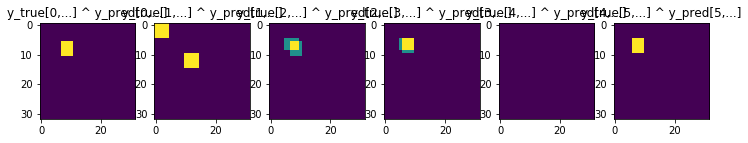

In [82]:
plt.figure(figsize=(12, 4))

n = len(y_true)

for i in range(n):
    plt.subplot(1,n,i+1)
    plt.title("y_true[%i,...] ^ y_pred[%i,...]" % (i, i))
    plt.imshow(y_true[i,:,:,0] + y_pred[i,:,:,0])

In [83]:
jaccard_index(y_true, y_pred, verbose=1), dice_coeff(y_true, y_pred, verbose=1), cosine_similarity(y_true, y_pred, verbose=1)

index:  [  5.00000000e-17   2.00000000e-17   2.90322581e-01   6.66666667e-01
   1.00000000e+00   1.00000000e+00]
coeff:  [ 0.    0.    0.45  0.8   0.    1.  ]
coeff:  [ 0.      0.      0.0225  0.04    0.      0.05  ]


(0.49283154121863798, 0.375, 0.018749999999999999)

In [5]:
from data_utils import train_ids
from image_utils import get_image_data

In [ ]:
index = 100

In [ ]:
img = get_image_data(train_ids[index], "Train")
img2 = get_image_data(train_ids[index + 10], "Train")
mask = get_image_data(train_ids[index], "Train")